<a href="https://colab.research.google.com/github/PasinduWaidyarathna/Deep-Learning-Mini-Project-02/blob/main/train02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import LSTM

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Dataset

In [50]:
data = pd.read_csv("/content/drive/MyDrive/TILE Historical Data.csv")

In [51]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/18/2017,19.04,19.04,19.04,19.04,NaN,0.00%
1,1/19/2017,19.04,19.04,19.04,19.04,NaN,0.00%
2,1/20/2017,19.04,19.10,19.10,19.10,0.13K,0.00%
3,1/23/2017,19.04,19.04,19.04,19.04,NaN,0.00%
4,1/24/2017,19.36,19.20,19.40,19.20,4.64K,1.68%


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1661 non-null   object 
 1   Price     1661 non-null   float64
 2   Open      1661 non-null   float64
 3   High      1661 non-null   float64
 4   Low       1661 non-null   float64
 5   Vol.      1421 non-null   object 
 6   Change %  1661 non-null   object 
dtypes: float64(4), object(3)
memory usage: 91.0+ KB


Spliting Data as Train and Validation

In [53]:
length_data = len(data)
split_ratio = 0.8
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)



Data length : 1661
Train data length : 1329
Validation data lenth : 332


In [58]:
train_data = data[['Date', 'Open']].iloc[:length_train]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2017-01-18,19.04
1,2017-01-19,19.04
2,2017-01-20,19.10
3,2017-01-23,19.04
4,2017-01-24,19.20
...,...,...
1324,2022-09-27,62.50
1325,2022-09-28,62.80
1326,2022-09-29,68.10
1327,2022-09-30,69.90


In [60]:
validation_data = data[['Date', 'Open']].iloc[length_train:]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data


,Date,Open
1329,2022-10-04,63.0
1330,2022-10-05,64.0
1331,2022-10-06,62.0
1332,2022-10-07,57.6
1333,2022-10-11,58.6
...,...,...
1656,2024-02-12,46.3
1657,2024-02-13,46.3
1658,2024-02-14,46.5
1659,2024-02-15,47.0


Creating Train Dataset from Train split

In [61]:
dataset_train = train_data.Open.values
dataset_train.shape

(1329,)

In [62]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1329, 1)

Normalization / Feature Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1329, 1)

visualisation

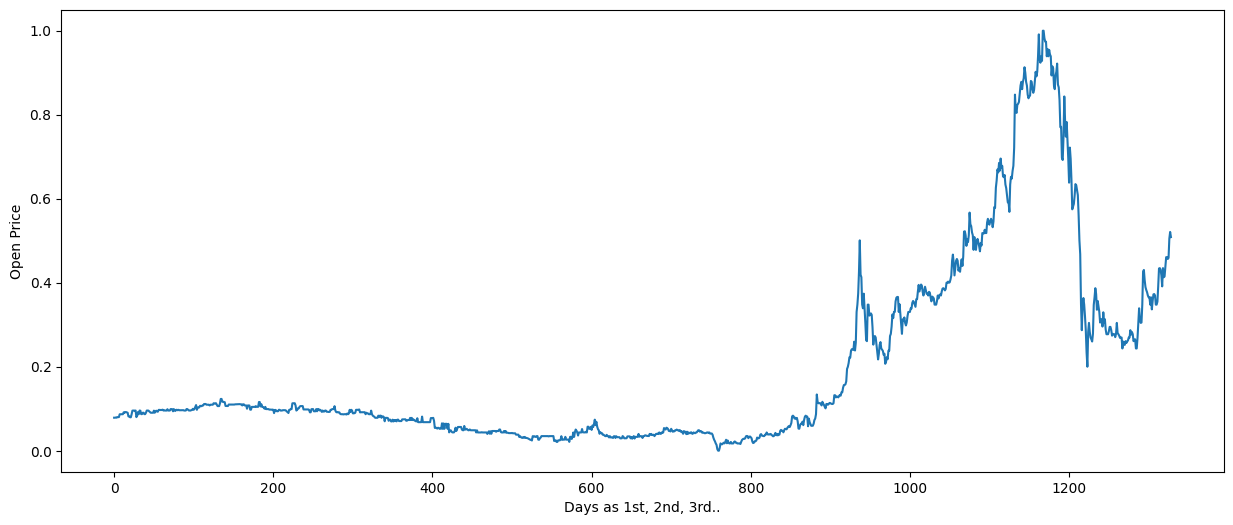

In [64]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

Creating X_train and y_train from Train data

In [65]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [67]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1279, 50)
Shape of y_train before reshape : (1279,)


Reshape

In [68]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1279, 50, 1)
Shape of y_train after reshape : (1279, 1)


In [69]:
X_train[0]

array([[0.0786087 ],
       [0.0786087 ],
       [0.07913043],
       [0.0786087 ],
       [0.08      ],
       [0.08      ],
       [0.08      ],
       [0.08678261],
       [0.08678261],
       [0.08678261],
       [0.08678261],
       [0.08695652],
       [0.09147826],
       [0.09043478],
       [0.092     ],
       [0.092     ],
       [0.09130435],
       [0.09043478],
       [0.08173913],
       [0.08173913],
       [0.07965217],
       [0.07965217],
       [0.08695652],
       [0.09547826],
       [0.09565217],
       [0.09565217],
       [0.09478261],
       [0.09565217],
       [0.08      ],
       [0.08347826],
       [0.09217391],
       [0.08695652],
       [0.09565217],
       [0.09530435],
       [0.08713043],
       [0.08713043],
       [0.09043478],
       [0.09043478],
       [0.08713043],
       [0.08713043],
       [0.09043478],
       [0.09565217],
       [0.09565217],
       [0.09565217],
       [0.09391304],
       [0.09217391],
       [0.09043478],
       [0.090

In [70]:
y_train[0]

array([0.09547826])

Creating RNN model

In [71]:
# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
40/40 [==============================] - 5s 51ms/step - loss: 0.3010 - accuracy: 7.8186e-04
Epoch 2/50
40/40 [==============================] - 3s 77ms/step - loss: 0.1886 - accuracy: 0.0016
Epoch 3/50
40/40 [==============================] - 2s 46ms/step - loss: 0.1247 - accuracy: 0.0016
Epoch 4/50
40/40 [==============================] - 2s 40ms/step - loss: 0.0832 - accuracy: 0.0016
Epoch 5/50
40/40 [==============================] - 2s 41ms/step - loss: 0.0553 - accuracy: 0.0016
Epoch 6/50
40/40 [==============================] - 2s 41ms/step - loss: 0.0382 - accuracy: 0.0023
Epoch 7/50
40/40 [==============================] - 2s 41ms/step - loss: 0.0305 - accuracy: 0.0016
Epoch 8/50
40/40 [==============================] - 2s 42ms/step - loss: 0.0306 - accuracy: 0.0016
Epoch 9/50
40/40 [==============================] - 3s 68ms/step - loss: 0.0240 - accuracy: 0.0023
Epoch 10/50
40/40 [==============================] - 2s 53ms/step - loss: 0.0196 - accuracy: 0.0016
Epoch

Evaluating Model

In [72]:
history.history["loss"]

[0.30099859833717346,
 0.18862301111221313,
 0.12467934191226959,
 0.08316277712583542,
 0.055315639823675156,
 0.038243237882852554,
 0.03048853762447834,
 0.030578073114156723,
 0.023962967097759247,
 0.0196481104940176,
 0.016962727531790733,
 0.017996827140450478,
 0.01452456135302782,
 0.013272348791360855,
 0.01223188079893589,
 0.011320658028125763,
 0.010607920587062836,
 0.01060533244162798,
 0.009734460152685642,
 0.007040464319288731,
 0.009037455543875694,
 0.007420039735734463,
 0.00785397831350565,
 0.007094585336744785,
 0.006644081324338913,
 0.006985637359321117,
 0.005497780162841082,
 0.005178212188184261,
 0.006155638489872217,
 0.004987427964806557,
 0.005214510951191187,
 0.0050995806232094765,
 0.004223763011395931,
 0.005737612023949623,
 0.004145385697484016,
 0.004367726389318705,
 0.004207073710858822,
 0.0034275308717042208,
 0.0035507534630596638,
 0.0037977625615894794,
 0.0036149625666439533,
 0.0037064377684146166,
 0.003787603694945574,
 0.0027627276722

Plotting Loss vs Epochs

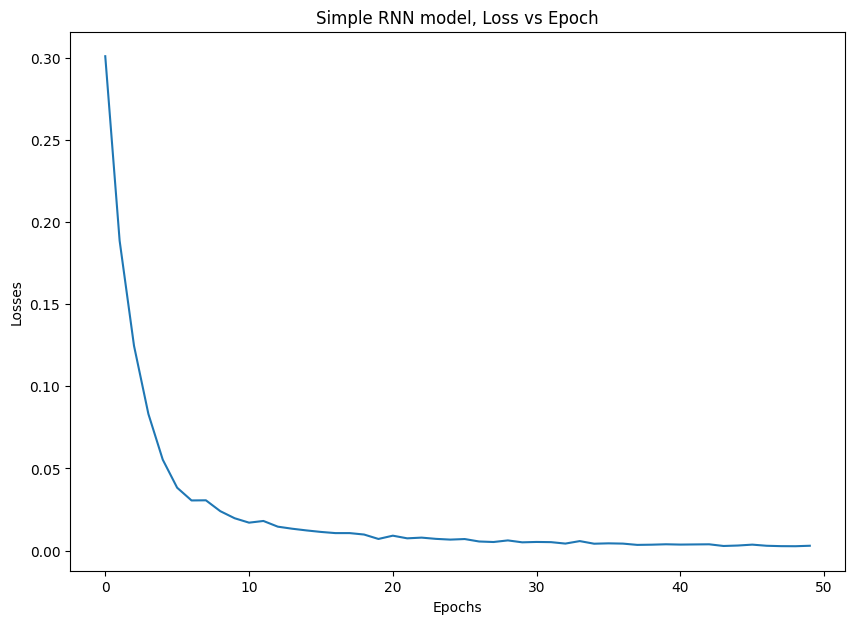

In [73]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

Plotting Accuracy vs Epochs

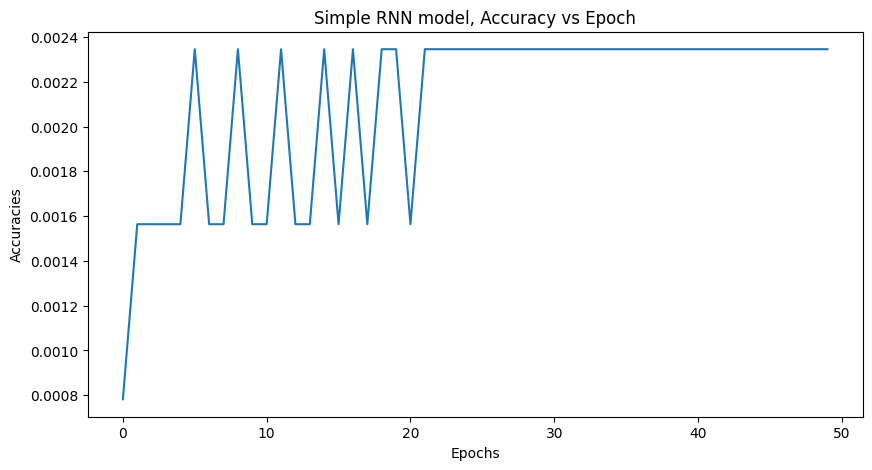

In [74]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

Model predictions for train data

In [75]:
y_pred = regressor.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape

40/40 [==============================] - 1s 21ms/step


(1279, 1)

In [76]:
y_train = scaler.inverse_transform(y_train)
y_train.shape

(1279, 1)

visualisation

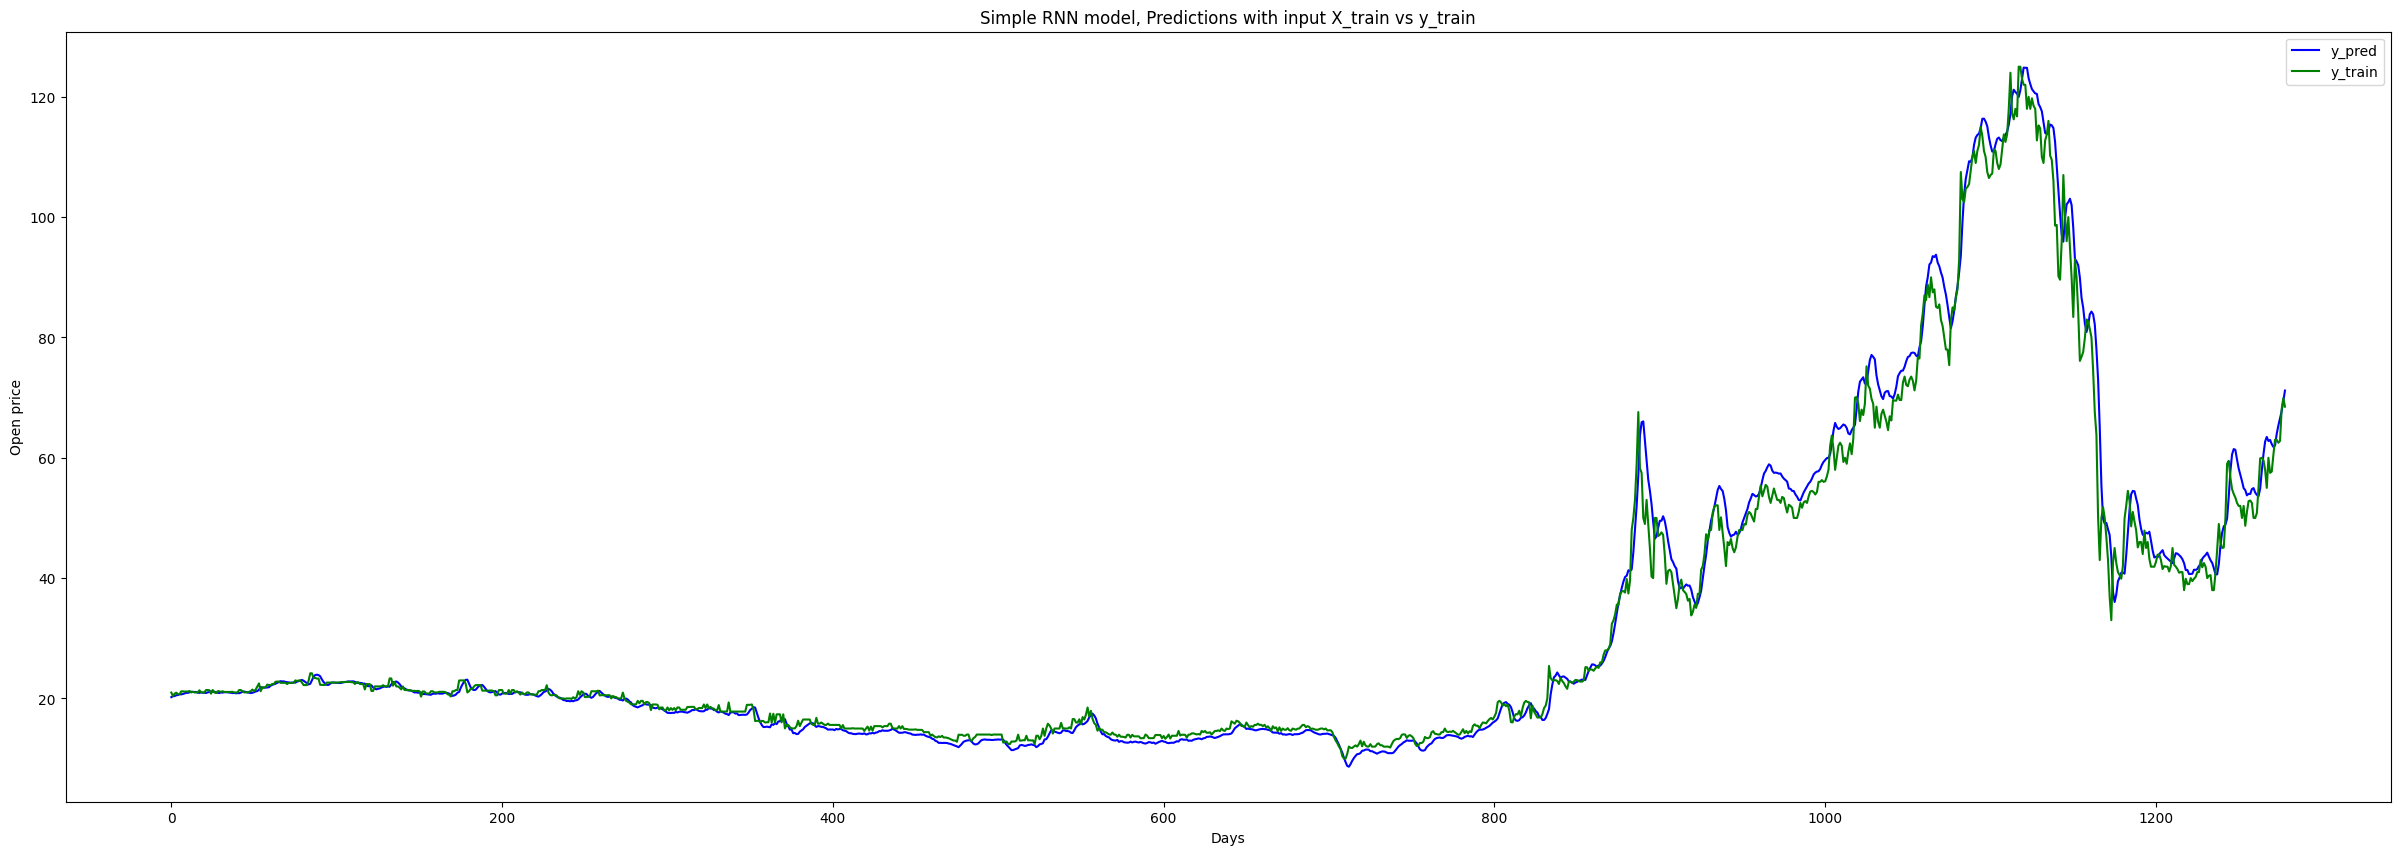

In [77]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

Creating Test Dataset from Validation Data

In [78]:
# Converting array and scaling
dataset_validation = validation_data.Open.values
dataset_validation = np.reshape(dataset_validation, (-1,1))
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (332, 1)


Creating X_test and y_test

In [79]:
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [80]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [81]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (282, 50)
Shape of y_test before reshape : (282,)


Reshape

In [82]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_test = np.reshape(y_test, (-1,1))

In [83]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (282, 50, 1)
Shape of y_test after reshape : (282, 1)


Evaluating with Validation Data

In [84]:
y_pred_of_test = regressor.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

9/9 [==============================] - 0s 11ms/step
Shape of y_pred_of_test : (282, 1)


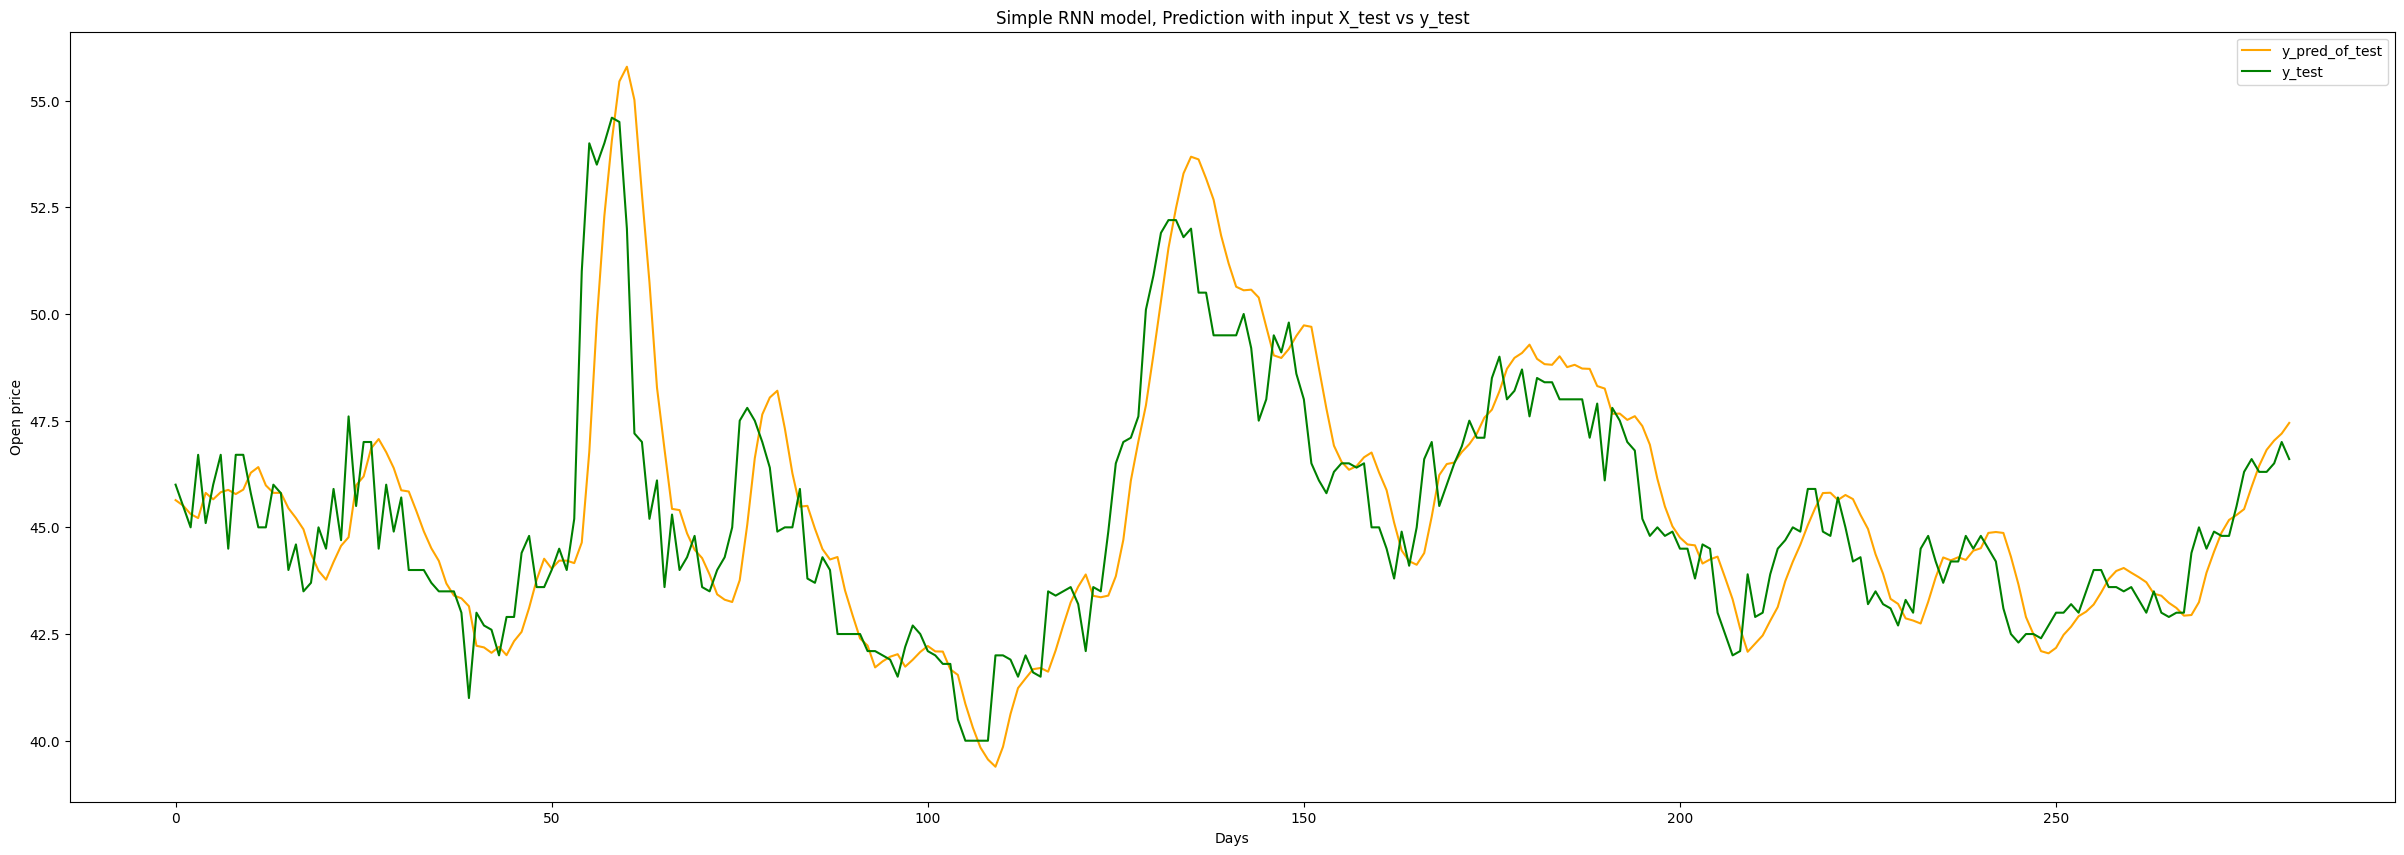

In [85]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

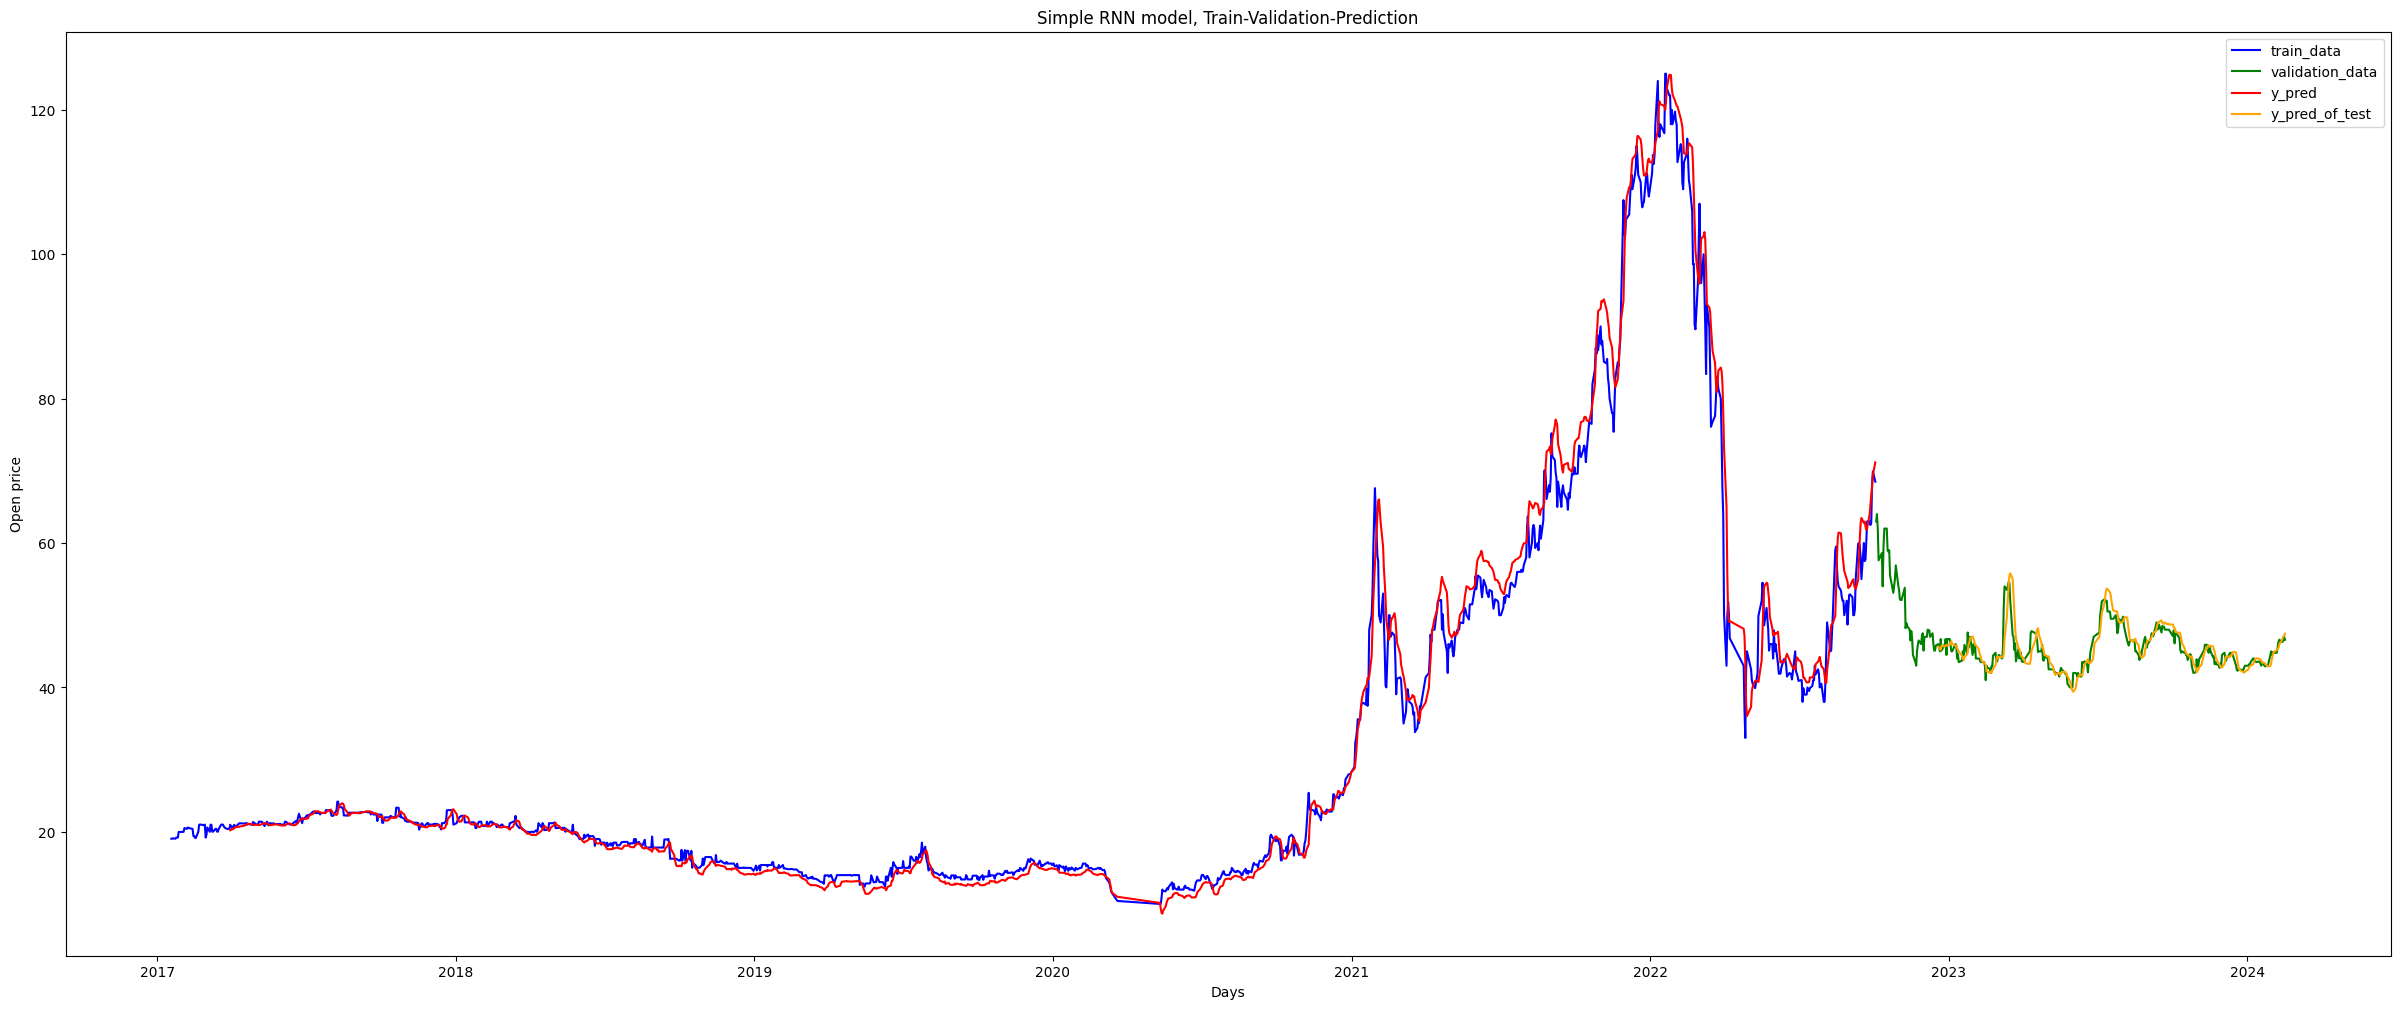

In [86]:
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

Creating LSTM Model

In [87]:
y_train = scaler.fit_transform(y_train)

In [89]:
model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1)))
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
128/128 [==============================] - 8s 34ms/step - loss: 0.0034 - accuracy: 0.0023
Epoch 2/10
128/128 [==============================] - 6s 45ms/step - loss: 0.0012 - accuracy: 0.0023
Epoch 3/10
128/128 [==============================] - 4s 35ms/step - loss: 0.0011 - accuracy: 0.0023
Epoch 4/10
128/128 [==============================] - 5s 39ms/step - loss: 9.1510e-04 - accuracy: 0.0023
Epoch 5/10
128/128 [==============================] - 5s 40ms/step - loss: 8.0293e-04 - accuracy: 0.0023
Epoch 6/10
128/128 [==============================] - 4s 35ms/step - loss: 6.2597e-04 - accuracy: 0.0023
Epoch 7/10
128/128 [==============================] - 6s 44ms/step - loss: 6.5094e-04 - accuracy: 0.0023
Epoch 8/10
128/128 [==============================] - 5s 35ms/step - loss: 5.4276e-04 - accuracy: 0.0023
Epoch 9/10
128/128 [==============================] - 4s 34ms/step - loss: 6.7815e-04 - accuracy: 0.0023
Epoch 10/10
128/128 [==============================] - 6s 45ms/step

Evaluating LSTM Model

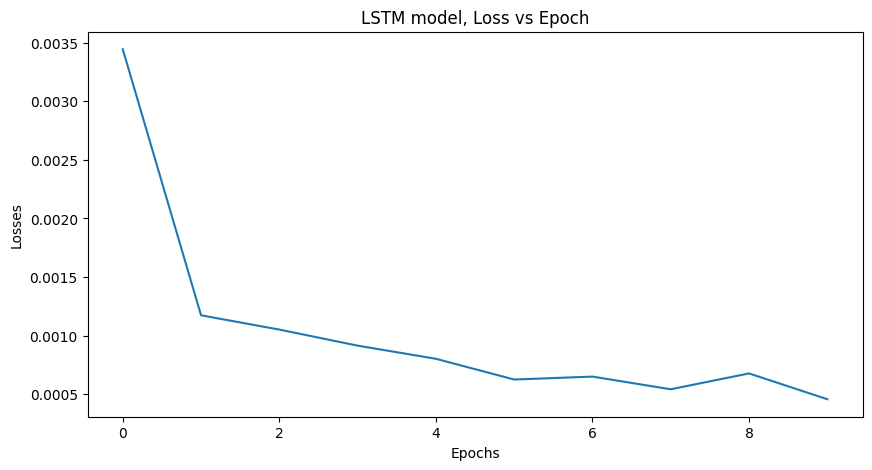

In [98]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Loss vs Epoch")
plt.show()

9/9 [==============================] - 1s 14ms/step


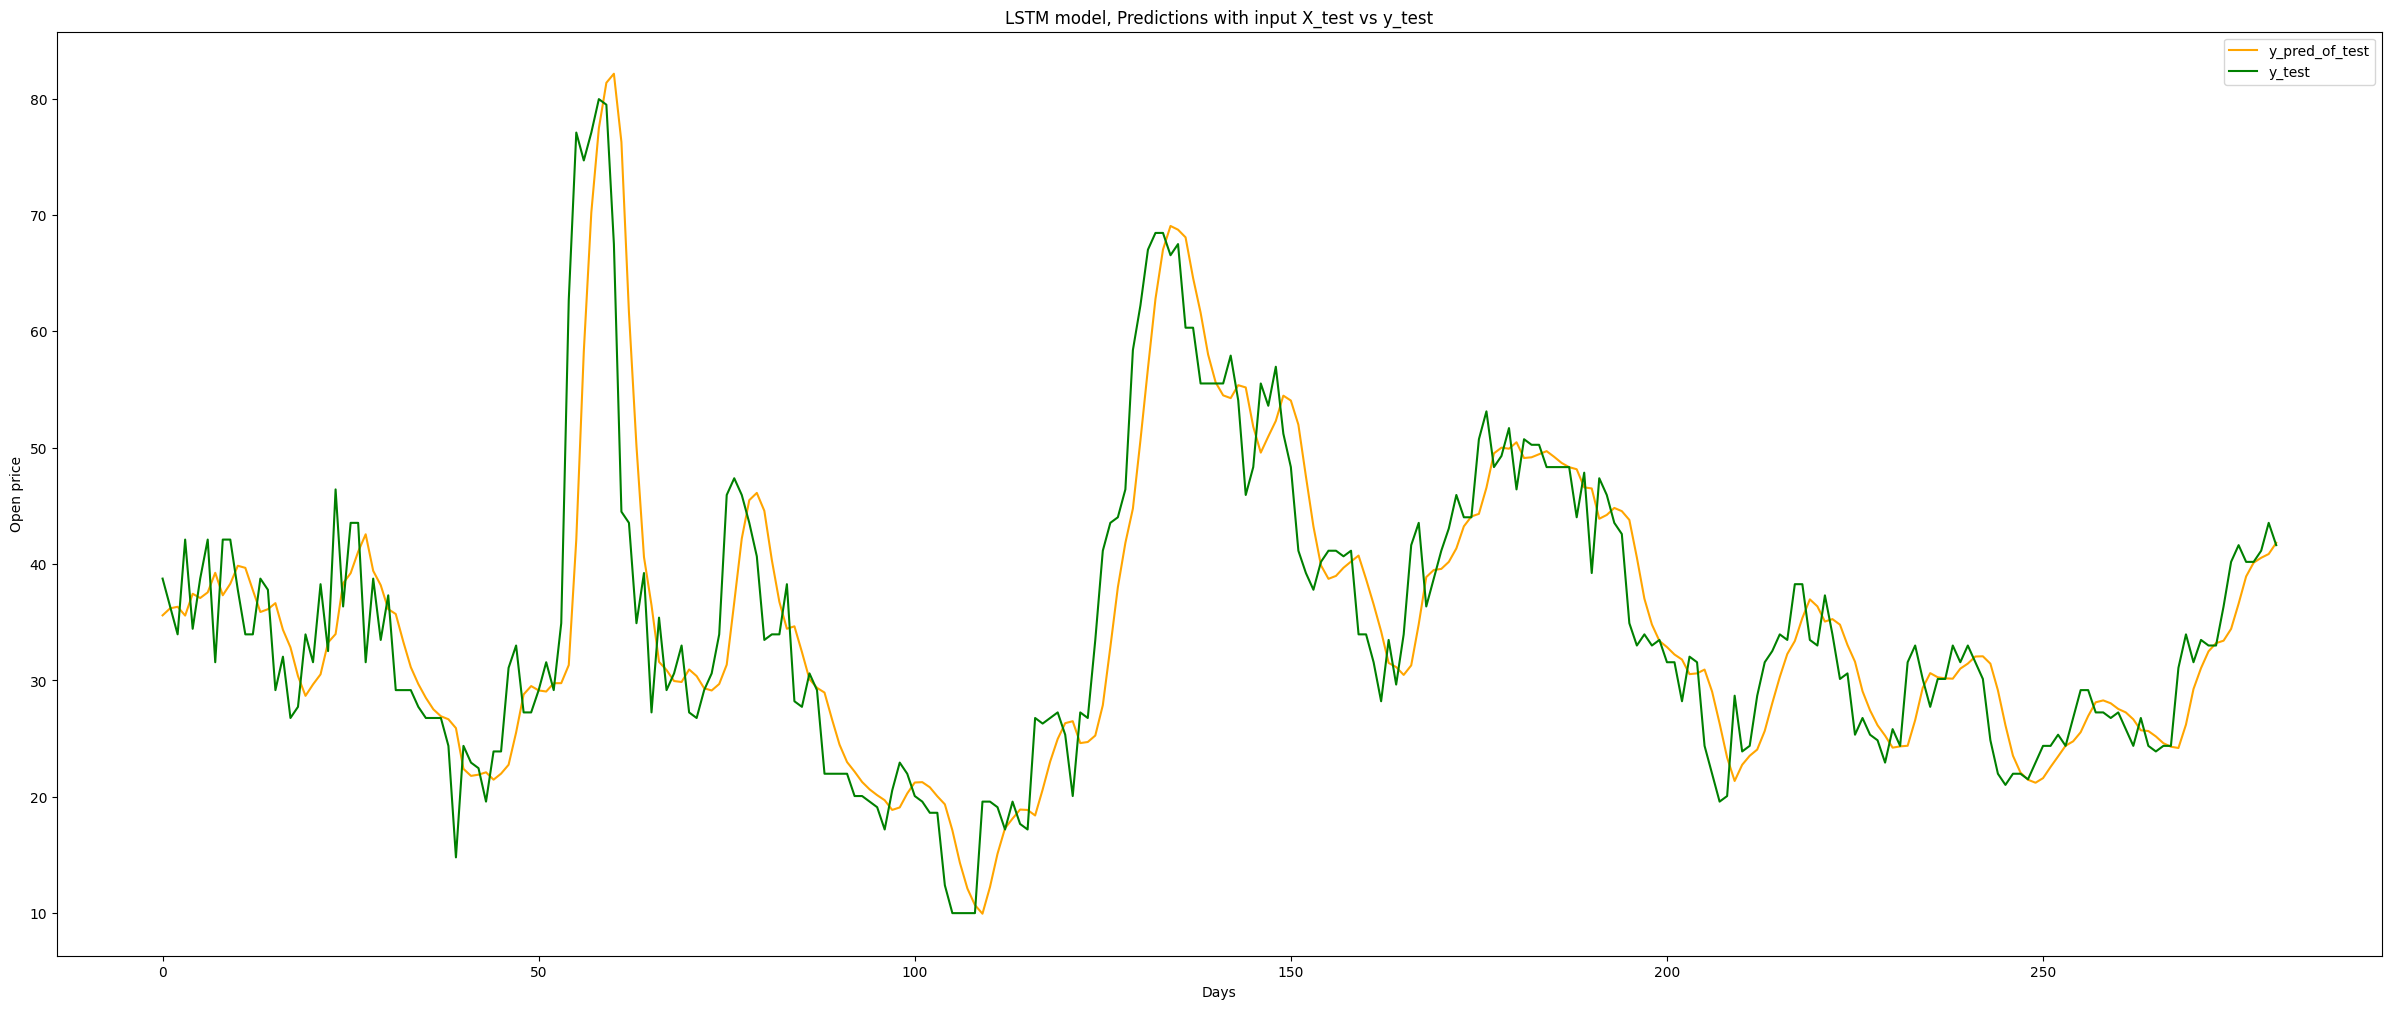

In [91]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

Future price prediction

In [92]:
data.iloc[-1]

Date        2/16/2024
Price            47.5
Open             46.6
High             47.6
Low              46.6
Vol.          129.95K
Change %        1.06%
Name: 1660, dtype: object

In [93]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.46808511],
        [0.53191489],
        [0.40425532],
        [0.29787234],
        [0.40425532],
        [0.40425532],
        [0.53191489],
        [0.46808511],
        [0.53191489],
        [0.46808511],
        [0.40425532],
        [0.17021277],
        [0.04255319],
        [0.        ],
        [0.04255319],
        [0.04255319],
        [0.0212766 ],
        [0.08510638],
        [0.14893617],
        [0.14893617],
        [0.19148936],
        [0.14893617],
        [0.25531915],
        [0.36170213],
        [0.36170213],
        [0.27659574],
        [0.27659574],
        [0.25531915],
        [0.27659574],
        [0.21276596],
        [0.14893617],
        [0.25531915],
        [0.14893617],
        [0.12765957],
        [0.14893617],
        [0.14893617],
        [0.44680851],
        [0.57446809],
        [0.46808511],
        [0.55319149],
        [0.53191489],
        [0.53191489],
        [0.68085106],
        [0.85106383],
        [0.91489362],
        [0

In [94]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 2/17/2024      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 2/17/2024 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 40ms/step
Simple RNN, Open price prediction for 2/17/2024      : 46.849598
LSTM prediction, Open price prediction for 2/17/2024 : 46.69635


Calculate the RMSE value for the model

In [95]:
from sklearn.metrics import mean_squared_error

print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (282, 1)
Shape of y_pred: (1279, 1)


In [96]:
if y_test.shape[0] != y_pred.shape[0]:
    y_pred = y_pred[:y_test.shape[0]]

In [97]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 21.12837891085298
